<a href="https://colab.research.google.com/github/mercyakshitha/FMML_LABS/blob/main/FMML_Module4_Lab3_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

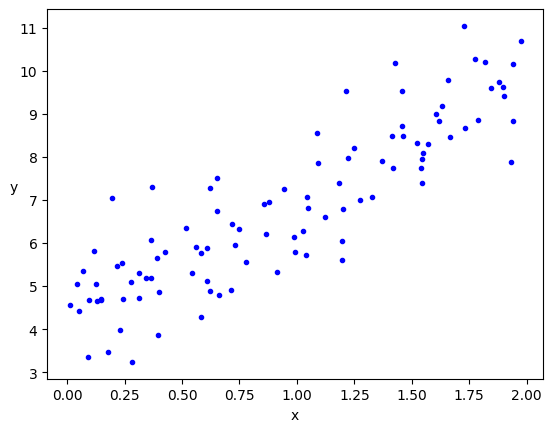

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [ ]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

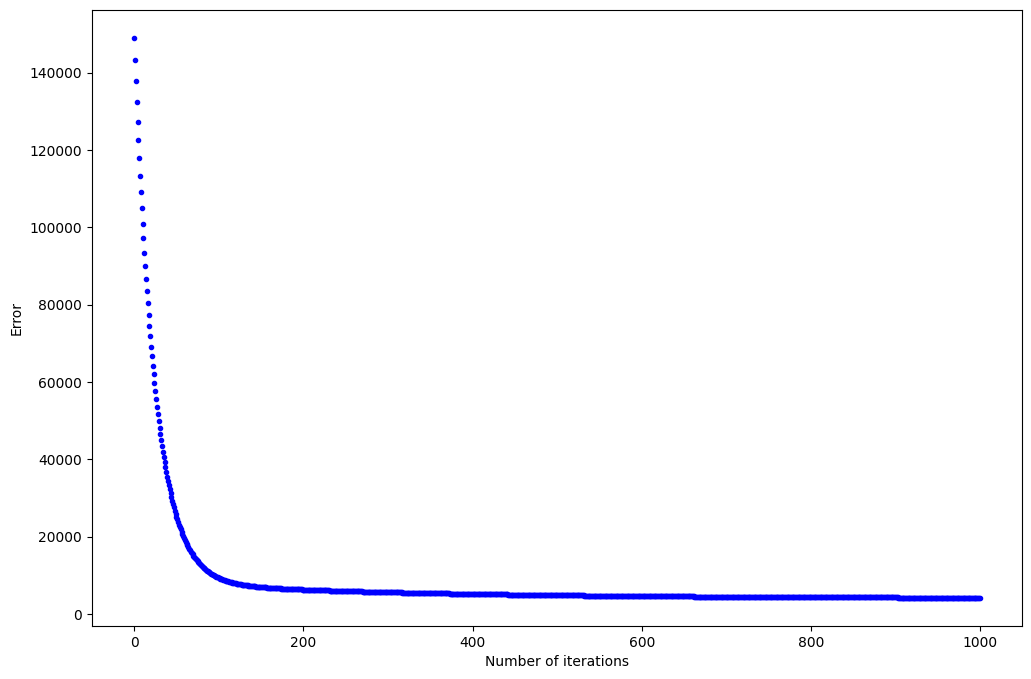

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

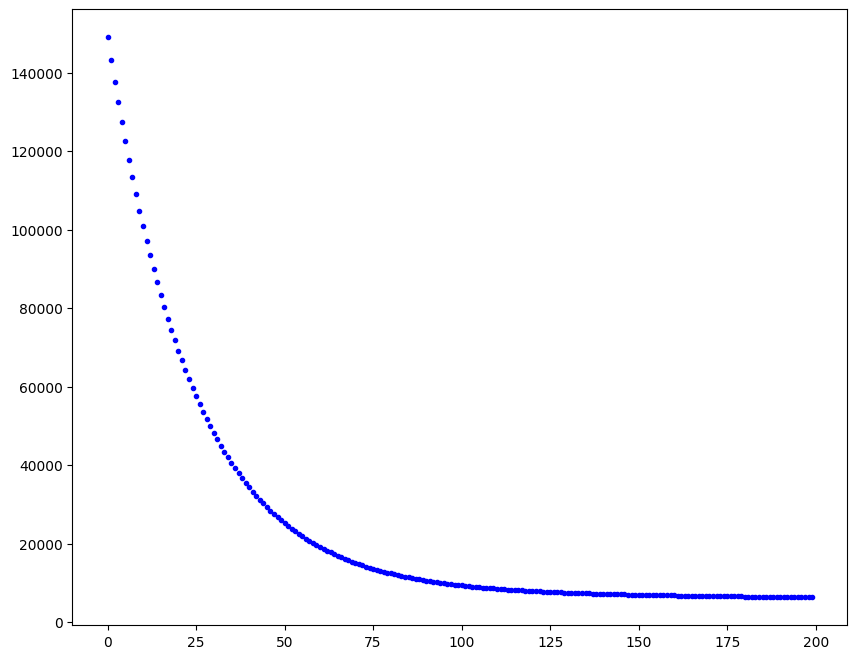

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


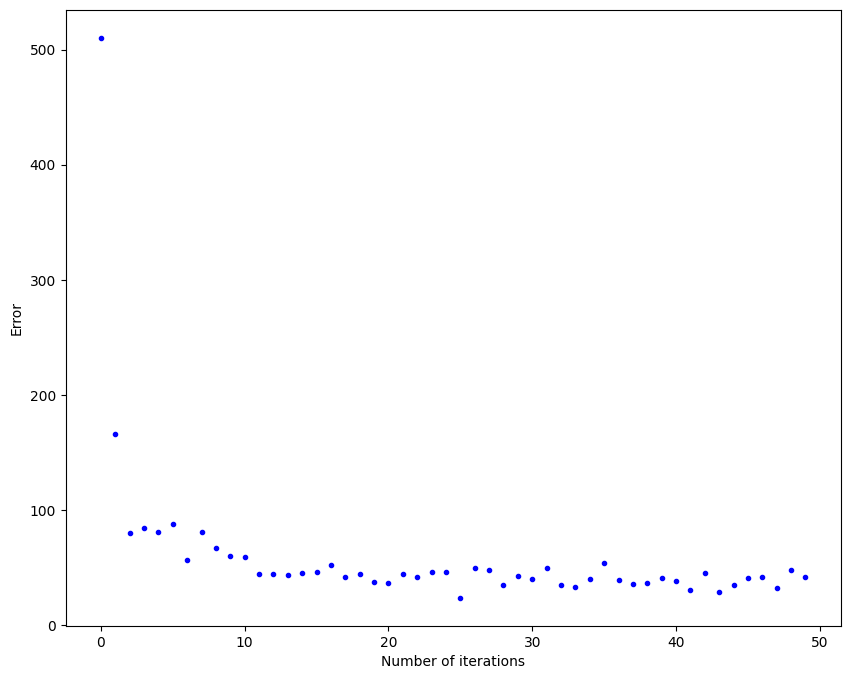

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


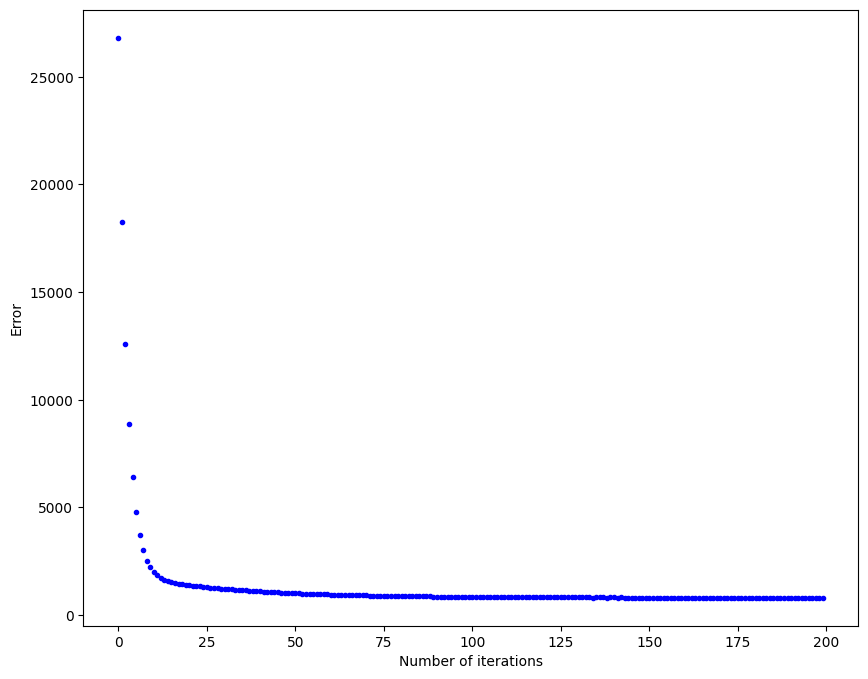

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

Question no 1:

Perceptron: A perceptron is a basic unit of a neural network, often used for binary classification tasks. It takes multiple input features, multiplies them with corresponding weights, sums them up, and applies an activation function to produce an output.

Gradient Descent: It's an optimization algorithm used to minimize the loss function in machine learning models. It works by iteratively moving in the direction of the steepest decrease of the loss function.

Mini-batch Gradient Descent: In mini-batch gradient descent, instead of computing the gradient of the entire dataset (batch gradient descent) or just one data point (stochastic gradient descent), you compute the gradient on small random subsets of the training data. This offers a balance between the robustness of batch gradient descent and the speed of stochastic gradient descent.

Here's an example Python code demonstrating how to implement mini-batch gradient descent with the ability to change the batch size:

In [ ]:
import numpy as np

# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 3)
y = 4 + np.dot(X, np.array([3, 5, 7])) + np.random.randn(100)

# Add bias term to features
X_b = np.c_[np.ones((100, 1)), X]

# Define mini-batch gradient descent function
def mini_batch_gradient_descent(X, y, learning_rate=0.01, batch_size=10, n_iterations=1000):
    m, n = X.shape
    theta = np.random.randn(n)

    for iteration in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients

    return theta

# Test the function with batch size of 10
theta = mini_batch_gradient_descent(X_b, y, batch_size=10)

print("Theta:", theta)


QUESTION NO 2:

Perceptron: We'll implement a simple perceptron classifier to classify the Iris dataset.

Gradient Descent: We'll use linear regression with gradient descent to predict a continuous variable in the Iris dataset.

Mini-batch Gradient Descent: We'll use mini-batch gradient descent with logistic regression to classify the Iris dataset.

Let's get started with the implementation:




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, SGDRegressor, LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Perceptron
perceptron_clf = Perceptron()
perceptron_clf.fit(X_train, y_train)
perceptron_pred = perceptron_clf.predict(X_test)
perceptron_accuracy = accuracy_score(y_test, perceptron_pred)
print("Perceptron Accuracy:", perceptron_accuracy)

# 2. Gradient Descent
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_regressor.fit(X_train, y_train)
sgd_pred = sgd_regressor.predict(X_test)
# For simplicity, let's round the predictions to the nearest integer
sgd_pred_rounded = np.round(sgd_pred).astype(int)
gradient_descent_accuracy = accuracy_score(y_test, sgd_pred_rounded)
print("Gradient Descent Accuracy:", gradient_descent_accuracy)

# 3. Mini-batch Gradient Descent (Logistic Regression)
logistic_regression_clf = LogisticRegression(solver='sag', max_iter=1000)
logistic_regression_clf.fit(X_train, y_train)
logistic_pred = logistic_regression_clf.predict(X_test)
mini_batch_gradient_descent_accuracy = accuracy_score(y_test, logistic_pred)
print("Mini-batch Gradient Descent Accuracy:", mini_batch_gradient_descent_accuracy)


Perceptron Accuracy: 0.8
Gradient Descent Accuracy: 1.0
Mini-batch Gradient Descent Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


question no:

let's compare the effects of changing the learning rate by the same amount in batch gradient descent (BGD), stochastic gradient descent (SGD), and mini-batch gradient descent (MBGD). We'll use a simple linear regression task for this comparison.

We'll create a synthetic dataset for linear regression and then train models using BGD, SGD, and MBGD with different learning rates. Finally, we'll compare the effect of changing the learning rate on the convergence and performance of these algorithms.

Here's the Python code to demonstrate this comparison:

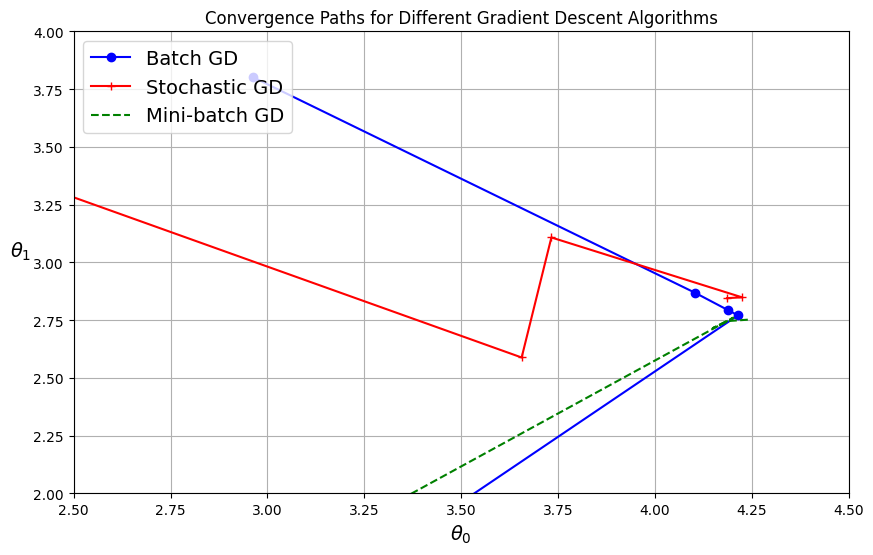

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to features
X_b = np.c_[np.ones((100, 1)), X]

# Define functions for batch gradient descent, stochastic gradient descent, and mini-batch gradient descent
def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=100):
    m = len(X)
    theta = np.random.randn(2,1)
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=100):
    m = len(X)
    theta = np.random.randn(2,1)
    for iteration in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

def mini_batch_gradient_descent(X, y, learning_rate=0.1, batch_size=10, n_iterations=100):
    m = len(X)
    theta = np.random.randn(2,1)
    for iteration in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Function to plot the convergence
def plot_convergence(theta_path_bgd, theta_path_sgd, theta_path_mbgd):
    plt.figure(figsize=(10,6))
    plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", label="Batch GD")
    plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-+", label="Stochastic GD")
    plt.plot(theta_path_mbgd[:, 0], theta_path_mbgd[:, 1], "g--", label="Mini-batch GD")
    plt.xlabel(r"$\theta_0$", fontsize=14)
    plt.ylabel(r"$\theta_1$   ", fontsize=14, rotation=0)
    plt.legend(loc="upper left", fontsize=14)
    plt.title("Convergence Paths for Different Gradient Descent Algorithms")
    plt.axis([2.5, 4.5, 2, 4])
    plt.grid(True)
    plt.show()

# Function to train models with different learning rates
def compare_learning_rates(learning_rates):
    theta_path_bgd = []
    theta_path_sgd = []
    theta_path_mbgd = []
    for lr in learning_rates:
        theta_bgd = batch_gradient_descent(X_b, y, learning_rate=lr)
        theta_path_bgd.append(theta_bgd.ravel())

        theta_sgd = stochastic_gradient_descent(X_b, y, learning_rate=lr)
        theta_path_sgd.append(theta_sgd.ravel())

        theta_mbgd = mini_batch_gradient_descent(X_b, y, learning_rate=lr)
        theta_path_mbgd.append(theta_mbgd.ravel())

    theta_path_bgd = np.array(theta_path_bgd)
    theta_path_sgd = np.array(theta_path_sgd)
    theta_path_mbgd = np.array(theta_path_mbgd)

    plot_convergence(theta_path_bgd, theta_path_sgd, theta_path_mbgd)

# Compare the effects of changing learning rates
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]
compare_learning_rates(learning_rates)
